In [ ]:
#Tuning Gradient Boosting Trees

In [16]:
#Load this line within an IPython notebook to visualize within the notebook
%matplotlib inline 

from __future__ import division #Load within Python 2.7 for regular division
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import fetch_california_housing

cali_housing = fetch_california_housing()

X = cali_housing.data
y = cali_housing.target

#bin output variable to split training and testing sets into two similar sets
bins = np.arange(6)
binned_y = np.digitize(y, bins)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,stratify=binned_y)

In [18]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import RandomizedSearchCV

param_dist = {
    'max_features': ['log2', 1.0],
    'max_depth': [3, 5, 7, 10],
    'min_samples_leaf': [2, 3, 5, 10],
    'n_estimators': [50, 100],
    'learning_rate': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.3],
    'loss': ['squared_error', 'huber']  # 将 'ls' 替换为 'squared_error'
}

pre_gs_inst = RandomizedSearchCV(
    GradientBoostingRegressor(warm_start=True),
    param_distributions=param_dist,
    cv=3,
    n_iter=30,
    n_jobs=-1
)

pre_gs_inst.fit(X_train, y_train)


RandomizedSearchCV(cv=3, estimator=GradientBoostingRegressor(warm_start=True),
                   n_iter=30, n_jobs=-1,
                   param_distributions={'learning_rate': [0.0001, 0.001, 0.01,
                                                          0.05, 0.1, 0.3],
                                        'loss': ['squared_error', 'huber'],
                                        'max_depth': [3, 5, 7, 10],
                                        'max_features': ['log2', 1.0],
                                        'min_samples_leaf': [2, 3, 5, 10],
                                        'n_estimators': [50, 100]})

In [24]:
import numpy as np
import pandas as pd

def get_grid_df(fitted_gs_estimator):
    res_dict = fitted_gs_estimator.cv_results_
 
    results_df = pd.DataFrame()
    for key in res_dict.keys():
         results_df[key] = res_dict[key]
 
    return results_df

def group_report(results_df):
    param_cols = [x for x in results_df.columns if 'param' in x and x is not 'params']
    focus_cols = param_cols + ['mean_test_score']
 
    print ("Grid CV Report \n")
 
    output_df = pd.DataFrame(columns = ['param_type','param_set', 'mean_score','mean_std'])
    cc = 0
    for param in param_cols:
        for key,group in results_df.groupby(param):
            output_df.loc[cc] = (param, key, group['mean_test_score'].mean(), group['mean_test_score'].std())
            cc += 1
    return output_df

results_df = get_grid_df(pre_gs_inst)
group_report(results_df)

Grid CV Report 



<>:14: SyntaxWarning: "is not" with a literal. Did you mean "!="?
<>:14: SyntaxWarning: "is not" with a literal. Did you mean "!="?
/var/folders/dv/3stz4zmn5jn1dhpcpw10k25h0000gp/T/ipykernel_18449/3229896529.py:14: SyntaxWarning: "is not" with a literal. Did you mean "!="?
  param_cols = [x for x in results_df.columns if 'param' in x and x is not 'params']


,param_type,param_set,mean_score,mean_std
0,param_n_estimators,50,0.543680,0.362398
1,param_n_estimators,100,0.497218,0.371387
2,param_min_samples_leaf,2,0.570974,0.354379
3,param_min_samples_leaf,3,0.414478,0.397617
4,param_min_samples_leaf,5,0.580138,0.340029
5,param_min_samples_leaf,10,0.522538,0.411176
6,param_max_features,1.0,0.338658,0.386716
7,param_max_features,log2,0.644224,0.293243
8,param_max_depth,3,0.197391,0.333458
9,param_max_depth,5,0.625635,0.336444


In [28]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import RandomizedSearchCV

param_dist = {
    'max_features': ['sqrt', 0.5, 1.0],
    'max_depth': [2, 3, 4],
    'min_samples_leaf': [3, 4],
    'n_estimators': [50, 100],
    'learning_rate': [0.2, 0.25, 0.3, 0.4],
    'loss': ['squared_error', 'huber']  # 将 'ls' 替换为 'squared_error'
}

pre_gs_inst = RandomizedSearchCV(
    GradientBoostingRegressor(warm_start=True),
    param_distributions=param_dist,
    cv=3,
    n_iter=30,
    n_jobs=-1
)

pre_gs_inst.fit(X_train, y_train)


RandomizedSearchCV(cv=3, estimator=GradientBoostingRegressor(warm_start=True),
                   n_iter=30, n_jobs=-1,
                   param_distributions={'learning_rate': [0.2, 0.25, 0.3, 0.4],
                                        'loss': ['squared_error', 'huber'],
                                        'max_depth': [2, 3, 4],
                                        'max_features': ['sqrt', 0.5, 1.0],
                                        'min_samples_leaf': [3, 4],
                                        'n_estimators': [50, 100]})

In [30]:
results_df = get_grid_df(pre_gs_inst)
group_report(results_df)

Grid CV Report 



,param_type,param_set,mean_score,mean_std
0,param_n_estimators,50,0.776886,0.025713
1,param_n_estimators,100,0.792580,0.021934
2,param_min_samples_leaf,3,0.770246,0.025742
3,param_min_samples_leaf,4,0.798390,0.014428
4,param_max_features,0.5,0.791294,0.021679
5,param_max_features,1.0,0.794518,0.020726
6,param_max_features,sqrt,0.769635,0.025568
7,param_max_depth,2,0.755249,0.015486
8,param_max_depth,3,0.789653,0.014597
9,param_max_depth,4,0.807427,0.006409


In [34]:
param_dist = {'max_features' : [0.4, 0.5, 0.6],
 'max_depth' : [5,6],
 'min_samples_leaf' : [4,5],
 'n_estimators': [300],
 'learning_rate' : [0.3],
 'loss' : ['ls','huber']
 }
rs_gbt = GradientBoostingRegressor(warm_start=True,
 max_features = 0.5,
 min_samples_leaf = 4,
 learning_rate=0.3,
 max_depth = 6,
 n_estimators = 4000,loss = 'huber')

rs_gbt.fit(X_train, y_train)

GradientBoostingRegressor(learning_rate=0.3, loss='huber', max_depth=6,
                          max_features=0.5, min_samples_leaf=4,
                          n_estimators=4000, warm_start=True)

In [38]:
y_pred = rs_gbt.predict(X_test)

from sklearn.metrics import r2_score, mean_absolute_error

# 打印 R-squared
print("R-squared:", r2_score(y_test, y_pred))

# 打印 MAE (Mean Absolute Error)
print("MAE:", mean_absolute_error(y_test, y_pred))

# 计算并打印 MAPE (Mean Absolute Percentage Error)
mape = (np.abs(y_test - y_pred) / y_test).mean() * 100
print("MAPE:", mape, "%")


R-squared: 0.8437406004562163
MAE: 0.3016969453116963
MAPE: 17.025890275636833 %


<Axes: >

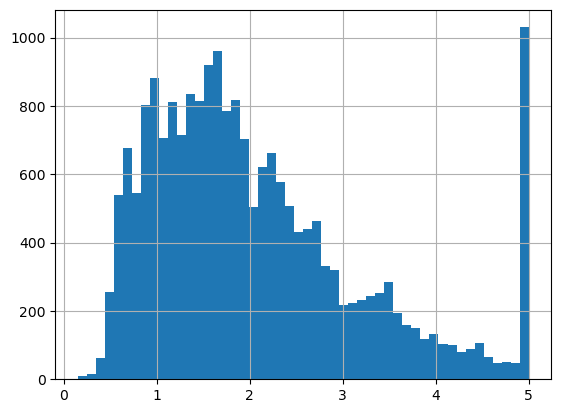

In [40]:
pd.Series(y).hist(bins=50)

In [42]:
bins = np.arange(6)
binned_y = np.digitize(y, bins)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,stratify=binned_y)

In [44]:
y_binary = np.where(y >= 5, 1,0)

train_shape = X_train.shape[0]

y_train_binned = y_binary[:train_shape]
y_test_binned = y_binary[train_shape:]

In [50]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import RandomizedSearchCV

param_dist = {
    'max_features': ['log2', 0.5, 1.0],
    'max_depth': [2, 3, 6],
    'min_samples_leaf': [1, 2, 3, 10],
    'n_estimators': [100],
    'learning_rate': [0.1, 0.2, 0.3, 1],
    'loss': ['log_loss']  # 修改为 'log_loss' 或 'exponential'
}

pre_gs_inst = RandomizedSearchCV(
    GradientBoostingClassifier(warm_start=True),
    param_distributions=param_dist,
    cv=3,
    n_iter=10,
    n_jobs=-1
)

pre_gs_inst.fit(X_train, y_train_binned)


RandomizedSearchCV(cv=3, estimator=GradientBoostingClassifier(warm_start=True),
                   n_jobs=-1,
                   param_distributions={'learning_rate': [0.1, 0.2, 0.3, 1],
                                        'loss': ['log_loss'],
                                        'max_depth': [2, 3, 6],
                                        'max_features': ['log2', 0.5, 1.0],
                                        'min_samples_leaf': [1, 2, 3, 10],
                                        'n_estimators': [100]})

In [52]:
pre_gs_inst.best_params_

{'n_estimators': 100,
 'min_samples_leaf': 10,
 'max_features': 'log2',
 'max_depth': 3,
 'loss': 'log_loss',
 'learning_rate': 0.1}

In [58]:
from sklearn.ensemble import GradientBoostingClassifier

# 正确的参数值
gbc = GradientBoostingClassifier(
    learning_rate=0.2,
    loss='log_loss',  # 将 'deviance' 修改为 'log_loss'
    max_depth=2,
    max_features=1.0,
    min_samples_leaf=2,
    n_estimators=1000,
    warm_start=True
).fit(X_train, y_train_binned)


In [60]:
y_pred = gbc.predict(X_test)

from sklearn.metrics import accuracy_score
accuracy_score(y_test_binned, y_pred)

0.937015503875969